In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
DATASET_ENCODING = "ISO-8859-1"
df = pd.read_csv(r'E:\Vignesh\twitter_new.csv', encoding=DATASET_ENCODING)
df.head()

,Sentiment,Id,Date,Flag,User,Tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [3]:
df.shape

(1048572, 6)

In [4]:
df_copy = df.copy()

In [5]:
# Check the column names in df_copy
print(df_copy.columns)


Index(['Sentiment', 'Id', 'Date', 'Flag', 'User', 'Tweet'], dtype='object')


In [6]:

df_copy['word counts'] = df_copy['Tweet'].apply(lambda x: len(x.split()))
df_copy.head()


,Sentiment,Id,Date,Flag,User,Tweet,word counts
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",19
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,21
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,18
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,10
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",21


In [7]:
def char_counts(x):
    x = x.split()
    x = ''.join(x)
    return len(x)

In [8]:
df_copy['char counts'] = df_copy['Tweet'].apply(lambda x : char_counts(x))
df_copy.head()

,Sentiment,Id,Date,Flag,User,Tweet,word counts,char counts
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",19,96
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,21,90
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,18,71
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,10,37
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",21,90


In [9]:
df_copy['average_word_len'] = df_copy['char counts']/df_copy['word counts']
df_copy.head()

,Sentiment,Id,Date,Flag,User,Tweet,word counts,char counts,average_word_len
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",19,96,5.052632
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,21,90,4.285714
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,18,71,3.944444
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,10,37,3.700000
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",21,90,4.285714


In [10]:
from nltk.corpus import stopwords

In [11]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Abirami
[nltk_data]     SK\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [12]:
stop_words = stopwords.words('english')

In [13]:
df['Tweet'] = df['Tweet'].apply(lambda x : ' '.join([t for t in x.split() if t not in stop_words]))

In [14]:
df.head()

,Sentiment,Id,Date,Flag,User,Tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,upset can't update Facebook texting it... migh...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times ball. Managed sav...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,whole body feels itchy like fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, behaving all. i'm mad. he..."


In [15]:
def remove(x):
    x = x.split()
    for i in range(len(x)):
        if(x[i].startswith('@')):
            x[i] = x[i].replace('@','')
        elif(x[i].startswith('#')):
            x[i].replace('#','')
    return ' '.join(x)

In [16]:
remove('@robbiebronniman Sounds like great night')

'robbiebronniman Sounds like great night'

In [17]:
df['Tweet'] = df['Tweet'].apply(lambda x : remove(x))

In [18]:
df.head()

,Sentiment,Id,Date,Flag,User,Tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"switchfoot http://twitpic.com/2y1zl - Awww, th..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,upset can't update Facebook texting it... migh...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,Kenichan I dived many times ball. Managed save...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,whole body feels itchy like fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"nationwideclass no, behaving all. i'm mad. her..."


In [19]:
df_copy.head()

,Sentiment,Id,Date,Flag,User,Tweet,word counts,char counts,average_word_len
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",19,96,5.052632
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,21,90,4.285714
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,18,71,3.944444
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,10,37,3.700000
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",21,90,4.285714


In [20]:
df_copy['numeric_counts'] = df_copy['Tweet'].apply(lambda x : len([t for t in x.split() if t.isdigit()]))

In [21]:
df_copy[df_copy['numeric_counts']==5]

,Sentiment,Id,Date,Flag,User,Tweet,word counts,char counts,average_word_len,numeric_counts
8733,0,1548341270,Fri Apr 17 20:41:16 PDT 2009,NO_QUERY,HayleyyFitch,@sydneohhh aww no its not hot at all! today i...,33,103,3.121212,5
22698,0,1557548816,Sun Apr 19 04:46:29 PDT 2009,NO_QUERY,4mariam,"I Went 2 school 4 2 hours only , the nurse cal...",24,64,2.666667,5
29842,0,1563599632,Sun Apr 19 23:28:05 PDT 2009,NO_QUERY,alyssawang,"2 exams, 1 paper, 1 quiz, 1 project, +hw all i...",14,48,3.428571,5
70248,0,1693599250,Sun May 03 23:05:15 PDT 2009,NO_QUERY,nkotb427,@donniewahlberg wanted 2 b there but had 2 com...,22,83,3.772727,5
108294,0,1824234530,Sun May 17 00:32:40 PDT 2009,NO_QUERY,sparkay,"its nearly 330 in the am, i've barely slept &a...",32,113,3.531250,5
...,...,...,...,...,...,...,...,...,...,...
979918,4,1833974703,Mon May 18 01:08:59 PDT 2009,NO_QUERY,akwikkel,13 weeks of &quot;fun in the sun&quot; with th...,30,109,3.633333,5
1003911,4,1880363088,Fri May 22 00:58:48 PDT 2009,NO_QUERY,rdfreak,@sopranokoala great weekend; 1 no food 2 no fo...,23,103,4.478261,5
1012127,4,1881170871,Fri May 22 03:50:09 PDT 2009,NO_QUERY,martemeg,Rode my bike to school - 50 minutes. Had p.e. ...,28,108,3.857143,5
1016000,4,1881643171,Fri May 22 05:12:19 PDT 2009,NO_QUERY,sara_meininger,30 days - 21 hours - 43 minutes and 13 seconds...,21,79,3.761905,5


In [22]:
df_copy.iloc[12969]

Sentiment                                                           0
Id                                                         1552060384
Date                                     Sat Apr 18 10:41:00 PDT 2009
Flag                                                         NO_QUERY
User                                                       springit89
Tweet               house feels so empty with 2 out of 3 roommates...
word counts                                                        18
char counts                                                        80
average_word_len                                             4.444444
numeric_counts                                                      2
Name: 12969, dtype: object

In [23]:
def remove_digit(x):
    x = x.split()
    for t in range(0,len(x)):
        if(x[t].isdigit()):
            x[t] = ''
    return ' '.join(x)

In [24]:
df['Tweet'] = df['Tweet'].apply(lambda x : remove_digit(x))

In [25]:
df['Tweet'] = df['Tweet'].apply(lambda x : str(x).lower())

In [26]:
df.iloc[12969]

Sentiment                                                    0
Id                                                  1552060384
Date                              Sat Apr 18 10:41:00 PDT 2009
Flag                                                  NO_QUERY
User                                                springit89
Tweet        house feels empty   roommates gone! im sooo lo...
Name: 12969, dtype: object

In [27]:
contractions = {
 "ain't": "am not",
 "aren't": "are not",
 "can't": "cannot",
 "can't've": "cannot have",
 "'cause": "because",
 "could've": "could have",
 "couldn't": "could not",
 "couldn't've": "could not have",
 "didn't": "did not",
 "doesn't": "does not",
 "don't": "do not",
 "hadn't": "had not",
 "hadn't've": "had not have",
 "hasn't": "has not",
 "haven't": "have not",
 "he'd": "he would",
 "he'd've": "he would have",
 "he'll": "he will",
 "he'll've": "he will have",
 "he's": "he is",
 "how'd": "how did",
 "how'd'y": "how do you",
 "how'll": "how will",
 "how's": "how does",
 "i'd": "i would",
 "i'd've": "i would have",
 "i'll": "i will",
 "i'll've": "i will have",
 "i'm": "i am",
 "i've": "i have",
 "isn't": "is not",
 "it'd": "it would",
 "it'd've": "it would have",
 "it'll": "it will",
 "it'll've": "it will have",
 "it's": "it is",
 "let's": "let us",
 "ma'am": "madam",
 "mayn't": "may not",
 "might've": "might have",
 "mightn't": "might not",
 "mightn't've": "might not have",
 "must've": "must have",
 "mustn't": "must not",
 "mustn't've": "must not have",
 "needn't": "need not",
 "needn't've": "need not have",
 "o'clock": "of the clock",
 "oughtn't": "ought not",
 "oughtn't've": "ought not have",
 "shan't": "shall not",
 "sha'n't": "shall not",
 "shan't've": "shall not have",
 "she'd": "she would",
 "she'd've": "she would have",
 "she'll": "she will",
 "she'll've": "she will have",
 "she's": "she is",
 "should've": "should have",
 "shouldn't": "should not",
 "shouldn't've": "should not have",
 "so've": "so have",
 "so's": "so is",
 "that'd": "that would",
 "that'd've": "that would have",
 "that's": "that is",
 "there'd": "there would",
 "there'd've": "there would have",
 "there's": "there is",
 "they'd": "they would",
 "they'd've": "they would have",
 "they'll": "they will",
 "they'll've": "they will have",
 "they're": "they are",
 "they've": "they have",
 "to've": "to have",
 "wasn't": "was not",
 " u ": " you ",
 " ur ": " your ",
 " n ": " and ",
 "won't": "would not",
 'dis': 'this',
 'bak': 'back',
 'brng': 'bring',
 "won't":"would not",
  'dis':'this',
 "bak":"back",
 "brng":'bring',
 "i'v" : 'i have'
 }

In [28]:
def expand(x):
    if type(x) is str:
        for key in contractions:
            value = contractions[key]
            x = x.replace(key,value)
        return x
    else:
        return x

In [29]:
df['Tweet'] = df['Tweet'].apply(lambda x : expand(x))

In [30]:
import re

Email removals and count

In [31]:
 # re.findall(r'([a-z0-9+._-]+@[a-z0-9+._-]+\.[a-z0-9+_-]+)',x)
df_copy['emails'] = df_copy['Tweet'].apply(lambda x : re.findall(r'([a-z0-9+._-]+@[a-z0-9+._-]+\.[a-z0-9+_-]+)',x))
df_copy['email_count'] = df_copy['emails'].apply(lambda x : len(x))
df_copy[df_copy['email_count']==1]

,Sentiment,Id,Date,Flag,User,Tweet,word counts,char counts,average_word_len,numeric_counts,emails,email_count
4054,0,1468735195,Tue Apr 07 03:26:47 PDT 2009,NO_QUERY,gabbyeight,I want a new laptop. HP TX2000 is the bomb. :...,20,83,4.150000,0,[gabbehhramos@yahoo.com],1
7917,0,1470004086,Tue Apr 07 08:03:42 PDT 2009,NO_QUERY,ElleDell,who stole elledell@gmail.com?,3,27,9.000000,0,[elledell@gmail.com],1
8496,0,1470213042,Tue Apr 07 08:41:06 PDT 2009,NO_QUERY,missatari,@alexistehpom really? did you send out all th...,20,110,5.500000,0,[missataari@gmail.com],1
10290,0,1550847940,Sat Apr 18 07:26:12 PDT 2009,NO_QUERY,caaaitysarah,@LaureyStack awh...that's kinda sad lol add m...,8,68,8.500000,0,[hello.kitty.65@hotmail.com],1
16413,0,1555904035,Sat Apr 18 21:02:02 PDT 2009,NO_QUERY,kluo,"@jilliancyork got 2 bottom of it, human error...",21,114,5.428571,1,[press@linkedin.com],1
...,...,...,...,...,...,...,...,...,...,...,...,...
1038722,4,1956716320,Thu May 28 22:30:43 PDT 2009,NO_QUERY,michael_mtp,@Bendels &gt; agentmp_04@hotmail.com.. thanks ...,11,75,6.818182,0,[agentmp_04@hotmail.com],1
1038969,4,1956745262,Thu May 28 22:35:02 PDT 2009,NO_QUERY,earthboundtea,@TeaBoat wgworldwide@gmail.com,2,29,14.500000,0,[wgworldwide@gmail.com],1
1042442,4,1957204391,Thu May 28 23:48:58 PDT 2009,NO_QUERY,fuelyourapps,@Rawsul fire an email to editor@fuelyourapps.c...,17,87,5.117647,0,[editor@fuelyourapps.com],1
1046000,4,1957616863,Fri May 29 01:03:35 PDT 2009,NO_QUERY,Thehodge,okay someone must have a google wave invite to...,12,68,5.666667,0,[dominichodgson@gmail.com],1


In [32]:
df['Tweet'] = df['Tweet'].apply(lambda x : re.sub(r'([a-z0-9+._-]+@[a-z0-9+._-]+\.[a-z0-9+_-]+)'," ",x))

Removal of special characters

In [33]:
df['Tweet'] = df['Tweet'].apply(lambda x : re.sub(r'[^\w]+'," ",x))

Remove URLs

In [34]:
df['Tweet'] = df['Tweet'].apply(lambda x : re.sub(r'(http|https|ftp|ssh)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?'," ",x))

In [35]:
df.head()

,Sentiment,Id,Date,Flag,User,Tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,switchfoot http twitpic com 2y1zl awww that is...
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,upset cannot update facebook texting it might ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,kenichan i dived many times ball managed save ...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,whole body feels itchy like fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,nationwideclass no behaving all i am mad here ...


In [36]:
df['Tweet'] = df['Tweet'].apply(lambda x : ' '.join(x.split()))

In [37]:
from bs4 import BeautifulSoup

In [38]:
from bs4 import BeautifulSoup

# Assuming df['Tweet'] contains the HTML content
df['Tweet'] = df['Tweet'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text().strip())


Removal of Accented Characters

In [39]:
import unicodedata

In [40]:
def remove_accented(x):
 x = unicodedata.normalize('NFKD',x).encode('ascii','ignore').decode('utf-8','ignore')
 return x

In [41]:
df.tail()

,Sentiment,Id,Date,Flag,User,Tweet
1048567,4,1960185836,Fri May 29 07:33:40 PDT 2009,NO_QUERY,WindmillBrixton,gringo star tonight southern garage http www f...
1048568,4,1960185847,Fri May 29 07:33:40 PDT 2009,NO_QUERY,techcoach,davidbass hee hee i will take rain wind chill ...
1048569,4,1960185945,Fri May 29 07:33:41 PDT 2009,NO_QUERY,timg888,today s message church service delivered via s...
1048570,4,1960186091,Fri May 29 07:33:42 PDT 2009,NO_QUERY,debraladiva,back home thought i would done week call alter...
1048571,4,1960186342,Fri May 29 07:33:44 PDT 2009,NO_QUERY,Madelinedugganx,my grandma making dinenr mum


In [42]:
df['Tweet'] = df['Tweet'].apply(lambda x : remove_accented(x))

Common Occurring words Removal

In [43]:
text = ' '.join(df['Tweet'])
len(text)

56512980

In [44]:
text = text.split()

In [45]:
freq_comm = pd.Series(text).value_counts()
fre = freq_comm[:20]
df['Tweet'] = df['Tweet'].apply(lambda x : ' '.join([w for w in x.split() if w not in fre]))
df.sample(10)

,Sentiment,Id,Date,Flag,User,Tweet
231542,0,1978984418,Sun May 31 01:10:38 PDT 2009,NO_QUERY,BroLindsay,melbrehl nowhere know web wack phoning
688799,0,2251610187,Sat Jun 20 04:02:49 PDT 2009,NO_QUERY,mart4hinesy,liamgallagher hola my half jus way slane looki...
624396,0,2229885844,Thu Jun 18 16:20:39 PDT 2009,NO_QUERY,Jose_Garay,been staying late long think might trade produ...
712983,0,2258694911,Sat Jun 20 16:20:41 PDT 2009,NO_QUERY,marcib98,know
105875,0,1823284739,Sat May 16 21:34:14 PDT 2009,NO_QUERY,queen_frostine,spicybrains ouch sorry hon ear problems fly ki...
865955,4,1677537894,Sat May 02 02:36:59 PDT 2009,NO_QUERY,theluiz,razorianfly your bday
733165,0,2264248797,Sun Jun 21 03:15:24 PDT 2009,NO_QUERY,rrrollers,stu knees strapped
511870,0,2190002813,Tue Jun 16 01:29:38 PDT 2009,NO_QUERY,NickkMuch,in library rory 1st nd 2nd nothing do little r...
122344,0,1833692033,Mon May 18 00:07:33 PDT 2009,NO_QUERY,savethewhaless1,emilycpetrie miss face lot
803376,4,1468367071,Tue Apr 07 01:14:11 PDT 2009,NO_QUERY,ravogd,in bonnybridge waitin late tnt delivery new sp...


Rare occuring words removal

In [46]:
rare20 = freq_comm.tail(100)

In [47]:
df['Tweet'] = df['Tweet'].apply(lambda x : ' '.join([w for w in x.split() if w not in rare20]))

In [48]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

In [49]:
neg_Tweet = df[df["Sentiment"]==0]

In [50]:
neg_text = ' '.join(neg_Tweet['Tweet'])

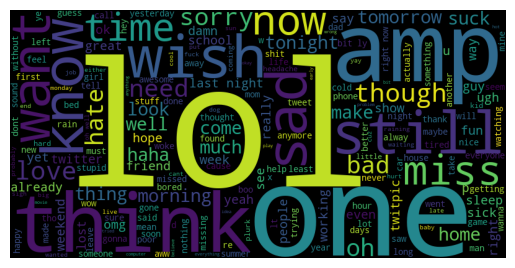

In [51]:
wc = WordCloud(width = 800,height = 400).generate(neg_text)
plt.imshow(wc)
plt.axis('off')
plt.show()

In [52]:
pos_Tweet = df[df['Sentiment']==4]

In [53]:
pos_text = " ".join(pos_Tweet['Tweet'])

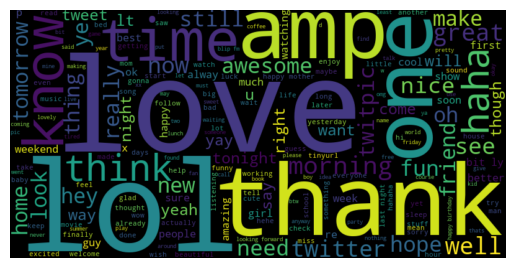

In [54]:
if not pos_text.strip():  # Check if pos_text is empty or just whitespace
    print("No words found in pos_text.")
else:
    pos_wc = WordCloud(width = 800, height = 400).generate(pos_text)
    plt.imshow(pos_wc, interpolation = 'bilinear')
    plt.axis('off')

In [55]:
df['Sentiment'].value_counts()

Sentiment
0    800000
4    248572
Name: count, dtype: int64

Training algorithm for sentiment analysis

In [56]:
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [57]:
X = df['Tweet']
y = df['Sentiment']

In [58]:

tfidf = TfidfVectorizer(norm = 'l1')

In [59]:
X = tfidf.fit_transform(X)

In [60]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=2, stratify=y)

In [61]:
X_train

<838857x481323 sparse matrix of type '<class 'numpy.float64'>'
	with 6328162 stored elements in Compressed Sparse Row format>

In [62]:
model_svm = LinearSVC()
model_svm.fit(X_train,y_train)

LinearSVC()

In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [63]:
y_pred = model_svm.predict(X_test)


In [64]:
acc_score = accuracy_score(y_test,y_pred)
print(acc_score)

0.836220585079751


In [65]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90    160000
           4       0.76      0.45      0.57     49715

    accuracy                           0.84    209715
   macro avg       0.80      0.70      0.73    209715
weighted avg       0.83      0.84      0.82    209715



In [66]:
print(confusion_matrix(y_test,y_pred))

[[152858   7142]
 [ 27205  22510]]


In [67]:
x = ['i am really happy. that you came with me']

In [68]:
model_svm.predict(tfidf.transform(x))[0]

0

Hyperparameter tuning

In [69]:
params = {
    'penalty' : ['l1','l2'],
    'loss' : ['higne','squared_hinge'],
    'dual' : ['auto',True,False],
    'tol' : [0.1,0.01,0.001],
    'C' : [1.0,2.0]
 }

In [70]:
gs = GridSearchCV(estimator = LinearSVC(), param_grid=params)

In [71]:
gs.fit(X,y)

GridSearchCV(estimator=LinearSVC(),
             param_grid={'C': [1.0, 2.0], 'dual': ['auto', True, False],
                         'loss': ['higne', 'squared_hinge'],
                         'penalty': ['l1', 'l2'], 'tol': [0.1, 0.01, 0.001]})

In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [72]:
gs.best_params_

{'C': 1.0, 'dual': True, 'loss': 'squared_hinge', 'penalty': 'l2', 'tol': 0.01}

In [73]:
model_svm_h = LinearSVC(penalty='l1',C = 1.0, dual=False, loss = 'squared_hinge', tol=0.1)

In [74]:
model_svm_h.fit(X_train,y_train)

LinearSVC(dual=False, penalty='l1', tol=0.1)

In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [75]:
y_pred_n = model_svm_h.predict(X_test)

In [76]:
print(accuracy_score(y_test,y_pred_n))

0.8355100970364542


In [77]:
print(classification_report(y_test,y_pred_n))

              precision    recall  f1-score   support

           0       0.85      0.95      0.90    160000
           4       0.75      0.46      0.57     49715

    accuracy                           0.84    209715
   macro avg       0.80      0.71      0.73    209715
weighted avg       0.83      0.84      0.82    209715



In [78]:
print(confusion_matrix(y_test,y_pred))

[[152858   7142]
 [ 27205  22510]]


In [79]:

x = ['i am really happy. that you came with me']

In [80]:
model_svm.predict(tfidf.transform(x))[0]

0

In [81]:
import scipy.sparse
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report

def run_svm(df):
    X = df['Tweet']
    y = df['Sentiment']
    
    # Reduce max_features
    tfidf = TfidfVectorizer(norm='l1', ngram_range=(1, 5), analyzer='word', max_features=1000)
    
    # Process data in batches
    batch_size = 1000
    X_batches = [tfidf.fit_transform(X[i:i+batch_size]) for i in range(0, len(X), batch_size)]
    
    # Concatenate sparse matrices
    X_concat = scipy.sparse.vstack(X_batches)
    
    X_train, X_test, y_train, y_test = train_test_split(X_concat, y[:X_concat.shape[0]], test_size=0.2, random_state=2, stratify=y[:X_concat.shape[0]])
    
    clf = LinearSVC(penalty='l1', C=1.0, dual=False, loss='squared_hinge', tol=0.1)
    clf.fit(X_train, y_train)
    
    y_pred = clf.predict(X_test)
    print('Accuracy Score:', accuracy_score(y_test, y_pred))
    print('Classification Report:')
    print(classification_report(y_test, y_pred))
    
    return tfidf, clf

tfidf, clf = run_svm(df)




Accuracy Score: 0.7631070738859881
Classification Report:
              precision    recall  f1-score   support

           0       0.76      1.00      0.87    160000
           4       0.55      0.00      0.01     49715

    accuracy                           0.76    209715
   macro avg       0.66      0.50      0.44    209715
weighted avg       0.71      0.76      0.66    209715



In [82]:
clf.predict(tfidf.transform(x))

array([0], dtype=int64)

In [83]:
import pickle

In [84]:
pickle.dump(clf,open('clf.pkl','wb'))
pickle.dump(tfidf,open('tfidf.pkl','wb'))

In [85]:
clf = pickle.load(open('clf.pkl','rb'))
tfidf = pickle.load(open('tfidf.pkl','rb'))

In [86]:
x = ['i am really happy. that you came with me']
x = tfidf.transform(x)

In [87]:
clf.predict(x)

array([0], dtype=int64)

Logistic Regression

In [88]:
from sklearn.linear_model import LogisticRegression

In [89]:
lr = LogisticRegression()

In [90]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

def run_lr(df):
    X = df['Tweet']
    y = df['Sentiment']
    
    # Reduce max_features and use sparse matrices
    tfidf = TfidfVectorizer(norm='l1', ngram_range=(1, 5), analyzer='word', max_features=1000)
    
    # Process data in batches
    batch_size = 1000
    X_batches = [tfidf.fit_transform(X[i:i+batch_size]) for i in range(0, len(X), batch_size)]
    
    # Concatenate sparse matrices
    X_concat = scipy.sparse.vstack(X_batches)
    
    X_train, X_test, y_train, y_test = train_test_split(X_concat, y[:X_concat.shape[0]], test_size=0.2, random_state=2, stratify=y[:X_concat.shape[0]])
    
    clf = LogisticRegression(max_iter=1000)
    clf.fit(X_train, y_train)
    
    y_pred = clf.predict(X_test)
    print('Accuracy Score:', accuracy_score(y_test, y_pred))
    print('Classification Report:')
    print(classification_report(y_test, y_pred))
    
    return tfidf, clf

tfidf_lr, clf_lr = run_lr(df)





Accuracy Score: 0.7631356841427652
Classification Report:
              precision    recall  f1-score   support

           0       0.76      1.00      0.87    160000
           4       0.54      0.01      0.01     49715

    accuracy                           0.76    209715
   macro avg       0.65      0.50      0.44    209715
weighted avg       0.71      0.76      0.66    209715



Decision Tree

In [91]:
from sklearn.tree import DecisionTreeClassifier
def run_decision_tree(df):
    X = df['Tweet']
    y = df['Sentiment']
    tfidf = TfidfVectorizer(norm = 'l1',ngram_range = (1,5),analyzer = 'word', max_features = 10000)
    X = tfidf.fit_transform(X)
    X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=2, stratify=y)
    print('shape of X ',X.shape)
    clf = DecisionTreeClassifier(criterion='entropy')
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    print('Accuracy Score ', accuracy_score(y_test,y_pred))
    print('Classification report ',classification_report(y_test,y_pred))
    return tfidf,clf
tfidf_dt,clf_dt = run_lr(df)

Accuracy Score: 0.7631356841427652
Classification Report:
              precision    recall  f1-score   support

           0       0.76      1.00      0.87    160000
           4       0.54      0.01      0.01     49715

    accuracy                           0.76    209715
   macro avg       0.65      0.50      0.44    209715
weighted avg       0.71      0.76      0.66    209715

